In [1]:
pip install pandas matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.9/160.9 kB 3.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 13.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 41.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.2/309.2 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 38.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 19.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 42.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 24.0 MB/s eta 0:00:0000:01:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 8.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 

In [3]:
import pandas as pd 
import os
import matplotlib.pyplot as plt 

In [4]:
def total_emissions_and_time(folder):
    
    files = []

    for csv_file in sorted(os.listdir(folder)):
        if csv_file.endswith('FULL_emissions.csv'):
            files.append(csv_file)
    
    full_df = pd.DataFrame()
    
    for file in files:
        df = pd.read_csv(os.path.join(folder, file))
        full_df = pd.concat([full_df, df])
    
    emissions = full_df['emissions'].sum()
    duration = full_df['duration'].sum()
    
    return emissions, duration

## Comparing CO₂eq emissions across assignments

In order to compare CO₂eq across assignments, the emission-csv files containing data of running the *entire* analysis for each assignment needs to be loaded:

In [5]:
# loading data for assignment 1
assignment1_path = os.path.join('emissions', 'assignment1')
assignment1_total_emissions, assignment1_total_duration = total_emissions_and_time(assignment1_path)

In [6]:
# loading data for assignment 2
assignment2_path = os.path.join('emissions', 'assignment2')
assignment2_total_emissions, assignment2_total_duration = total_emissions_and_time(assignment2_path)

In [7]:
# loading data for assignment 2
assignment3_path = os.path.join('emissions', 'assignment3')
assignment3_total_emissions, assignment3_total_duration = total_emissions_and_time(assignment3_path)

In [8]:
# loading data for assignment 2
assignment4_path = os.path.join('emissions', 'assignment4')
assignment4_total_emissions, assignment4_total_duration = total_emissions_and_time(assignment4_path)

In [10]:
emissions_path = os.path.join('emissions')

sorted(os.listdir(emissions_path))

['assignment1', 'assignment2', 'assignment3', 'assignment4']

In [39]:
emissions = []
durations = []

for folder in sorted(os.listdir(emissions_path)):

    subfolder_path = os.path.join(emissions_path, folder)

    emission, duration = total_emissions_and_time(subfolder_path)

    #empty_dict[f'{folder}'] = [emissions, duration]
    emissions.append(emission)
    durations.append(duration)
    

Text(0.5, 1.0, 'Emissions of CO₂eq across assignments')

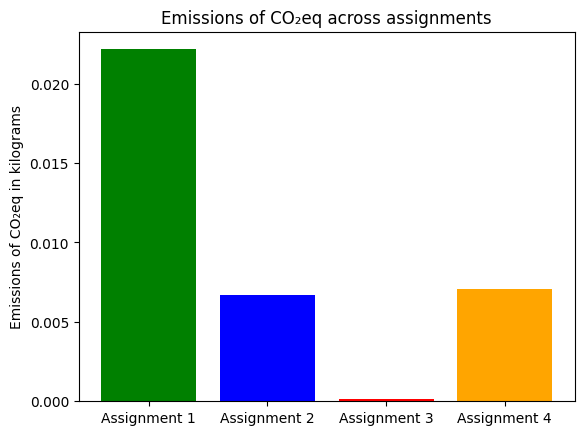

In [45]:
plt.bar(assignments, emissions, color = ['green', 'blue', 'red', 'orange'])
plt.ylabel('Emissions of CO₂eq in kilograms')
plt.title('Emissions of CO₂eq across assignments')

Text(0.5, 1.0, 'Emissions of CO₂eq across assignments')

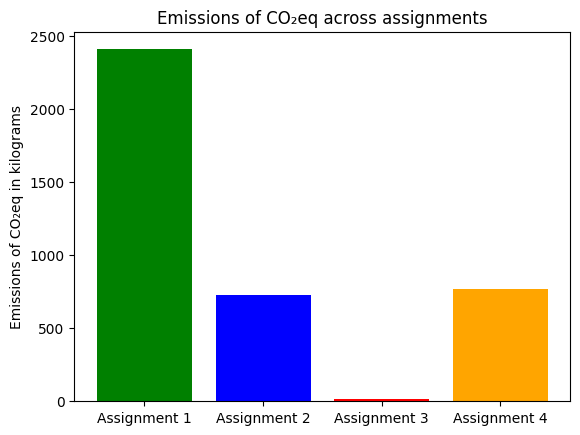

In [46]:
plt.bar(assignments, durations, color = ['green', 'blue', 'red', 'orange'])
plt.ylabel('Emissions of CO₂eq in kilograms')
plt.title('Emissions of CO₂eq across assignments')

In [43]:
assignments = [f'Assignment {i +1}' for i in range(len(os.listdir(emissions_path)))]

In [44]:
assignments

['Assignment 1', 'Assignment 2', 'Assignment 3', 'Assignment 4']

In [38]:
empty_list[0][1]

2409.5623667240143

In [34]:
list(empty_dict.values())

[[0.0221549727696685, 2409.5623667240143],
 [0.0067017864060713705, 729.0265603065491],
 [0.0001470989832752, 15.979722738265991],
 [0.0070586681529810754, 767.0277738571167]]

In [9]:
total_emissions_data = {'Assignment 1': assignment1_total_emissions,
        'Assignment 2': assignment2_total_emissions,
        'Assignment 3': assignment3_total_emissions,
        'Assignment 4': assignment4_total_emissions}

total_duration_data = {'Assignment 1': assignment1_total_duration,
        'Assignment 2': assignment2_total_duration,
        'Assignment 3': assignment3_total_duration,
        'Assignment 4': assignment4_total_duration}

In [10]:
total_emissions = list(total_emissions_data.values())
total_durations = list(total_duration_data.values())
assignments = list(total_emissions_data.keys())

#### Plotting the CO₂eq emissions of all assignments

Text(0.5, 1.0, 'Emissions of CO₂eq across assignments')

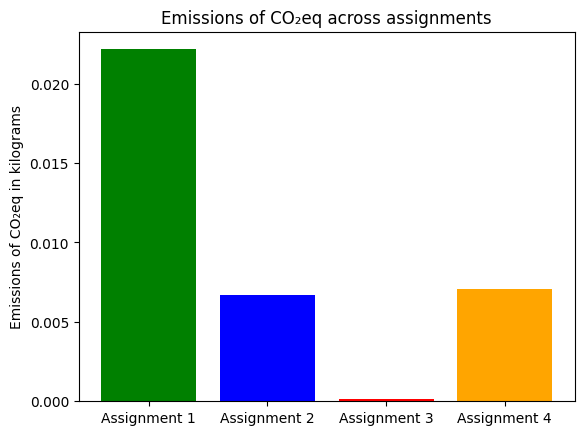

In [11]:
plt.bar(assignments, total_emissions, color = ['green', 'blue', 'red', 'orange'])
plt.ylabel('Emissions of CO₂eq in kilograms')
plt.title('Emissions of CO₂eq across assignments')

Text(0.5, 1.0, 'Duration of running scripts across assignments')

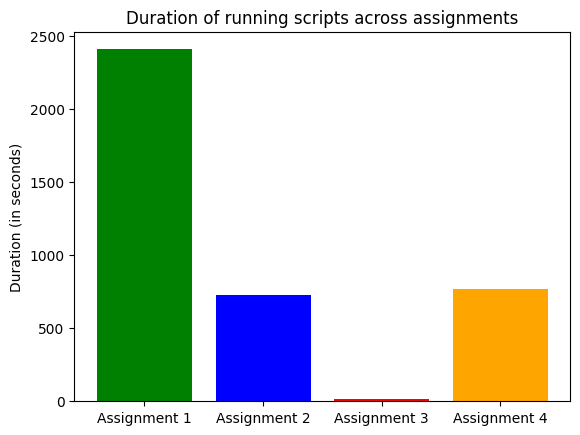

In [12]:
plt.bar(assignments, total_durations, color = ['green', 'blue', 'red', 'orange'])
plt.ylabel('Duration (in seconds)')
plt.title('Duration (in seconds)')

## Compare subtasks for each assignment

In order to compare the subtasks for each assignment, we need to load the csv files that contain information about the subtask emissions

In [47]:
def subtasks_emissions_and_time(folder):
    
    files = []

    for csv_file in sorted(os.listdir(folder)):
        if csv_file.endswith('subtasks_emissions.csv'):
            files.append(csv_file)
    
    subtasks_df = pd.DataFrame()
    
    for file in files:
        df = pd.read_csv(os.path.join(folder, file))
        subtasks_df = pd.concat([subtasks_df, df])
    
    return subtasks_df

In [48]:
def plot_emissions_subtasks(subtasks_df, assignment_number):

    names = list(subtasks_df['task_name'])
    emissions = list(subtasks_df['emissions'])

    # create plot
    fig, ax = plt.subplots(figsize = (8,4))
    ax.barh(names, emissions)
    ax.set_ylabel('Emissions of CO₂eq in kilograms')
    ax.set_title(f'Emissions of CO₂eq for tasks in Assignment {assignment_number}')
    #ax.tick_params(axis='x', labelrotation=80)
    fig.show()

    # also save to file ? 

In [50]:
def subtasks_emissions_and_time(folder):
    
    files = []

    for csv_file in sorted(os.listdir(folder)):
        if csv_file.endswith('subtasks_emissions.csv'):
            files.append(csv_file)
    
    subtasks_df = pd.DataFrame()
    
    for file in files:
        df = pd.read_csv(os.path.join(folder, file))
        subtasks_df = pd.concat([subtasks_df, df])
    
    return subtasks_df

def plot_emissions_subtasks(subtasks_df, assignment_number):

    names = list(subtasks_df['task_name'])
    emissions = list(subtasks_df['emissions'])

    # create plot
    fig, ax = plt.subplots(figsize = (8,4))
    ax.barh(names, emissions)
    ax.set_ylabel('Emissions of CO₂eq in kilograms')
    ax.set_title(f'Emissions of CO₂eq for tasks in Assignment {assignment_number}')
    
    out_path = os.path.join('out', f'subtasks_emissions_assignment_{assignment_number}.png')

    plt.savefig(out_path)

In [55]:
def hej(path):

    for i, v in enumerate(sorted(os.listdir(path))):

        subfolder_path = os.path.join(path, v)

        subtasks_df = subtasks_emissions_and_time(subfolder_path)
        plot_emissions_subtasks(subtasks_df, i+1)

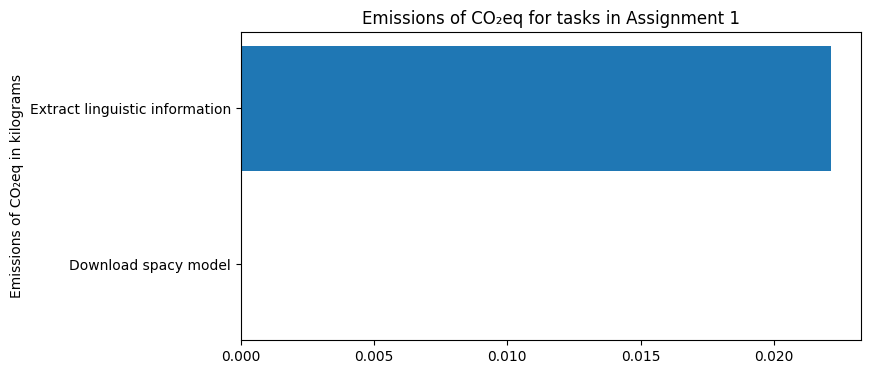

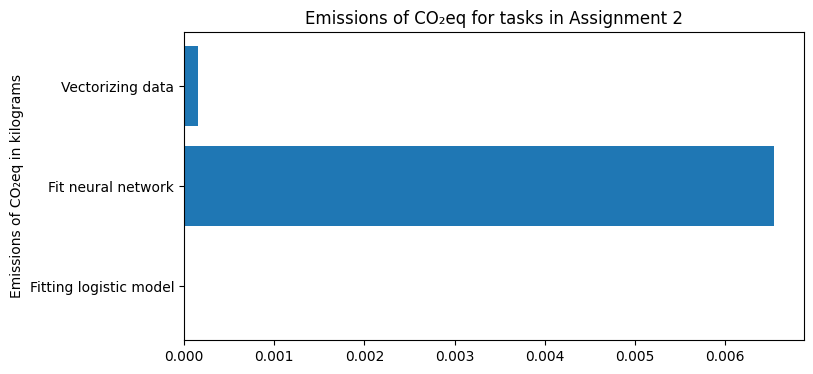

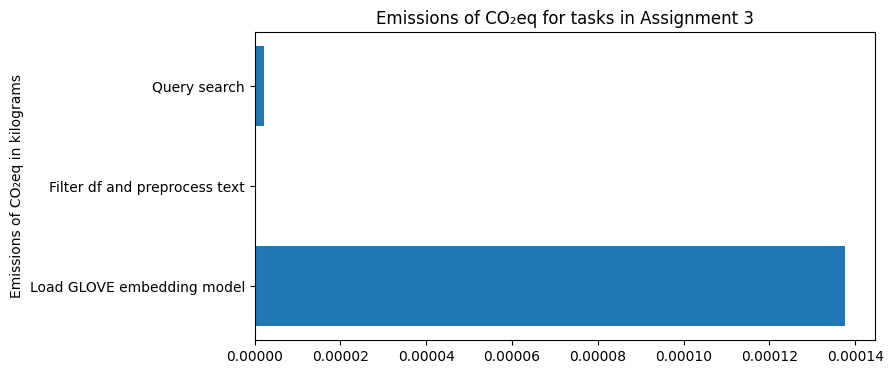

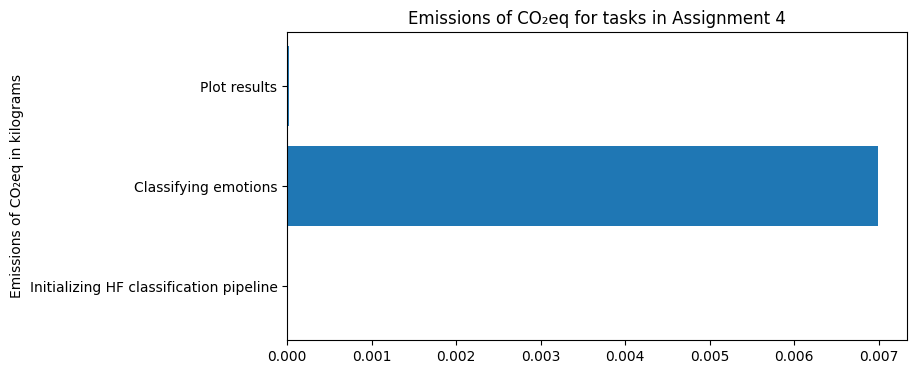

In [56]:
path = os.path.join('emissions')

hej(path)

#### Assignment 1

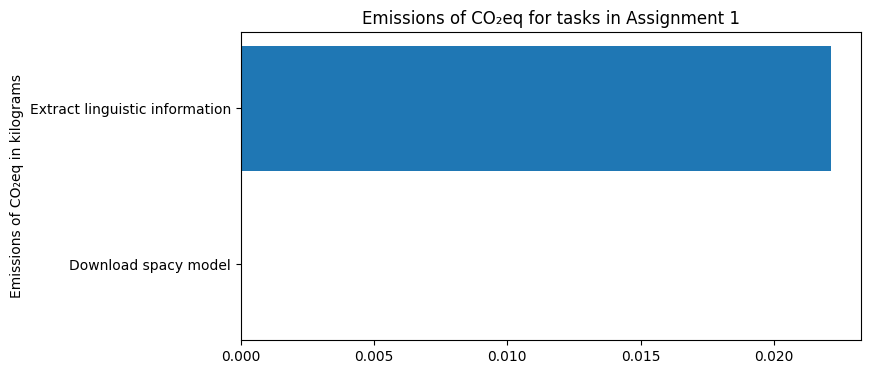

In [37]:
assignment1_subtasks_df = subtasks_emissions_and_time(assignment1_path)
assignment1_subtasks_df
plot_emissions_subtasks(assignment1_subtasks_df, 1)

#### Assignment 2

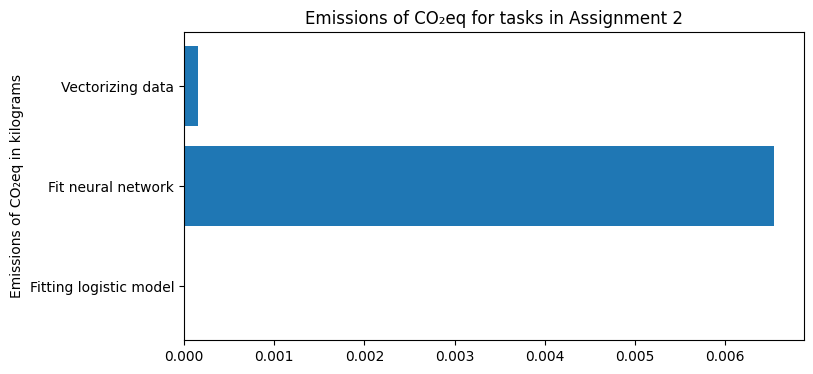

In [38]:
assignment2_subtasks_df = subtasks_emissions_and_time(assignment2_path)
plot_emissions_subtasks(assignment2_subtasks_df, 2)

#### Assignment 3

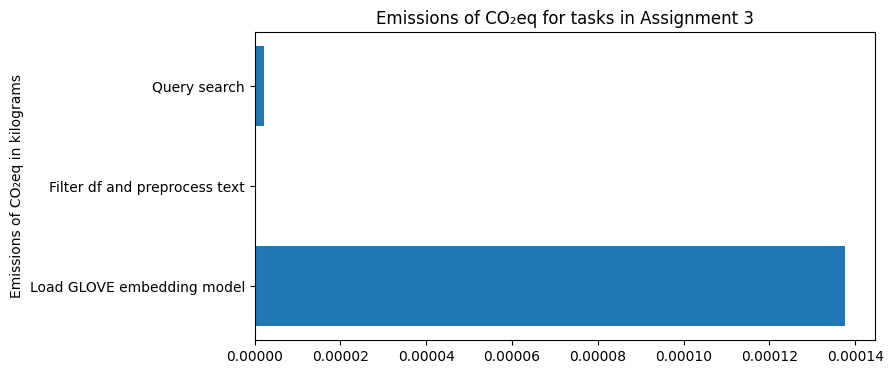

In [39]:
assignment3_subtasks_df = subtasks_emissions_and_time(assignment3_path)
plot_emissions_subtasks(assignment3_subtasks_df, 3)

#### Assignment 4

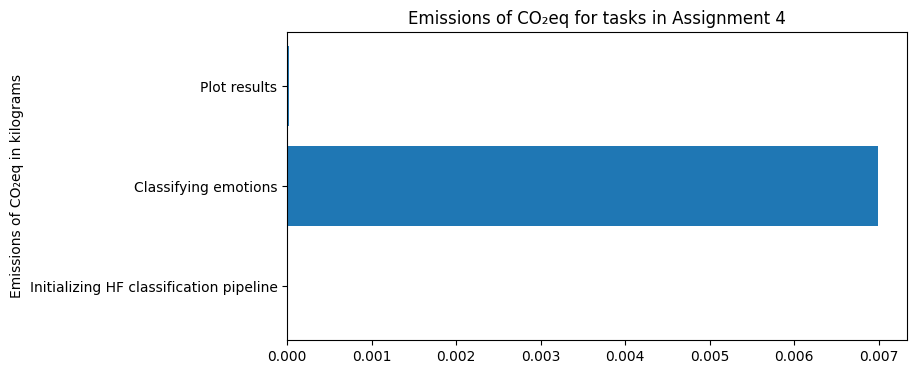

In [40]:
assignment4_subtasks_df = subtasks_emissions_and_time(assignment4_path)
plot_emissions_subtasks(assignment4_subtasks_df, 4)

#### Compare subtasks across all four assignments

In [26]:
# add column with assignment label and concatenate the dataframes
assignment1_subtasks_df['assignment'] = 1
assignment2_subtasks_df['assignment'] = 2
assignment3_subtasks_df['assignment'] = 3
assignment4_subtasks_df['assignment'] = 4

all_subtasks = pd.concat([assignment1_subtasks_df, assignment2_subtasks_df, assignment3_subtasks_df, assignment4_subtasks_df])

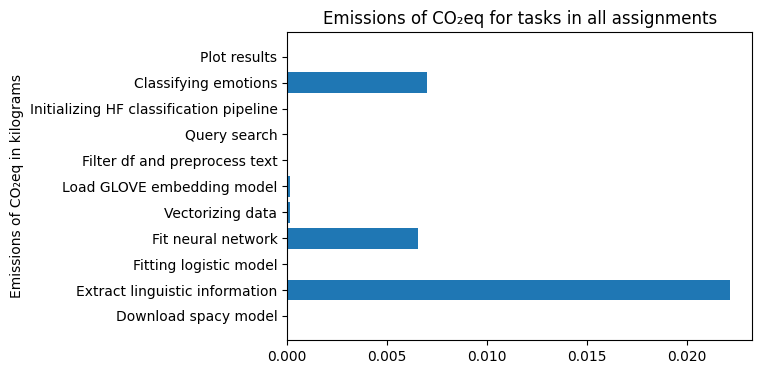

In [35]:
subtasks = list(all_subtasks['task_name'])
emissions = list(all_subtasks['emissions'])

# create plot
fig, ax = plt.subplots(figsize = (6,4))
ax.barh(subtasks, emissions)
ax.set_ylabel('Emissions of CO₂eq in kilograms')
ax.set_title('Emissions of CO₂eq for tasks in all assignments')
fig.show()